In [331]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.metrics import mean_squared_error
from src.mlp import MLP, Layer

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [324]:
df_training = pd.read_csv("data/mio1/regression/square-simple-training.csv", index_col=0)
df_test = pd.read_csv("data/mio1/regression/square-simple-test.csv", index_col=0)

In [328]:
x_train = df_training['x'].values.reshape(1, 100)
y_train = df_training['y'].values.reshape(1, 100) / 10

epoch: 0/10000.0
epoch: 1/10000.0
epoch: 2/10000.0
epoch: 3/10000.0
epoch: 4/10000.0
epoch: 5/10000.0
epoch: 6/10000.0
epoch: 7/10000.0
epoch: 8/10000.0
epoch: 9/10000.0
epoch: 10/10000.0
epoch: 11/10000.0
epoch: 12/10000.0
epoch: 13/10000.0
epoch: 14/10000.0
epoch: 15/10000.0
epoch: 16/10000.0
epoch: 17/10000.0
epoch: 18/10000.0
epoch: 19/10000.0
epoch: 20/10000.0
epoch: 21/10000.0
epoch: 22/10000.0
epoch: 23/10000.0
epoch: 24/10000.0
epoch: 25/10000.0
epoch: 26/10000.0
epoch: 27/10000.0
epoch: 28/10000.0
epoch: 29/10000.0
epoch: 30/10000.0
epoch: 31/10000.0
epoch: 32/10000.0
epoch: 33/10000.0
epoch: 34/10000.0
epoch: 35/10000.0
epoch: 36/10000.0
epoch: 37/10000.0
epoch: 38/10000.0
epoch: 39/10000.0
epoch: 40/10000.0
epoch: 41/10000.0
epoch: 42/10000.0
epoch: 43/10000.0
epoch: 44/10000.0
epoch: 45/10000.0
epoch: 46/10000.0
epoch: 47/10000.0
epoch: 48/10000.0
epoch: 49/10000.0
epoch: 50/10000.0
epoch: 51/10000.0
epoch: 52/10000.0
epoch: 53/10000.0
epoch: 54/10000.0
epoch: 55/10000.0
ep

<Axes: >

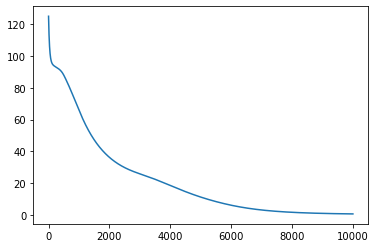

In [332]:
model = MLP(layers=[
    Layer(1, 6, activation="sigmoid"),
    Layer(6, 1, activation="linear")
])
loss = model.fit(x_train, y_train, learning_rate=0.001, epochs=1e4, verbose=1, batch_size=25)
sns.lineplot(loss)

In [333]:
y_predicted = model.predict(x_train)
mean_squared_error(y_train, y_predicted)

0.6389288363735824

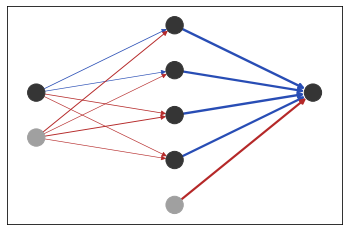

In [321]:
model.plot(log_weights=True)

<Axes: >

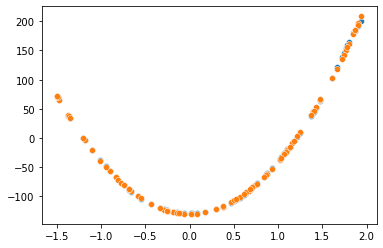

In [318]:
sns.scatterplot(x=x_train.reshape(100),y=y_predicted.reshape(100))
sns.scatterplot(x=x_train.reshape(100),y=y_train.reshape(100))

In [296]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [298]:
model = keras.Sequential(
    [
        layers.Dense(6, activation="sigmoid"),
        layers.Dense(1, activation="linear", name="layer3"),
    ]
)
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.